In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# graph size
N = 1000
# directed
d = True
# type: {True : maxpred, False: pred}
t = True 

## Visualization wrt different t

In [51]:
def plot_p0(prob, directed, n, res, t):
    # check the directed value
    if directed:
        lab = 'dir'
    else : lab = 'und'
    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'
    
    
    fig, axs = plt.subplots(len(res), 1, figsize = (8,12))
    for i, t in enumerate(res):
        data = {}
        for p in prob:
            # load data
            temp = pd.read_csv('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p), index_col=0)
            # on each realization check for which nodes the property is realized
            temp2 = temp[temp.resistance == t].groupby('realization').apply(lambda x: (x.max_level <= 1) & (x.avg_level < 0))
            data[p] = (pd.DataFrame(temp2).groupby('realization').sum() > 0).mean() 
            del temp, temp2
        
        # plot data
        axs[i].set_title('Phase transition for t = {}'.format(t), fontsize=15)
        _ = axs[i].plot(list(data.keys()), list(data.values()), 'o-')
        _ = axs[i].set_xlim(xmax=0.2)
        _ = axs[i].set_xlabel('probability')

        # delete from memory
        del data

    #plt.suptitle('Phase transition for maxlevel < 1, n = {}, {}'.format(n, lab), y=1.02, fontsize=20)
    plt.tight_layout()
    #plt.savefig('images/stats_per_node_{}_{}_{}.jpeg'.format(thr, lab, n))

Used probabilities: [0.0001, 0.0005, 0.002969251759660712, 0.004938503519321424, 0.009, 0.01, 0.01399999999999997, 0.018499999999999975, 0.02299999999999998, 0.027499999999999983, 0.03199999999999999, 0.03649999999999999, 0.040999999999999995, 0.0455, 0.05, 0.1, 0.6, 0.7, 0.8]


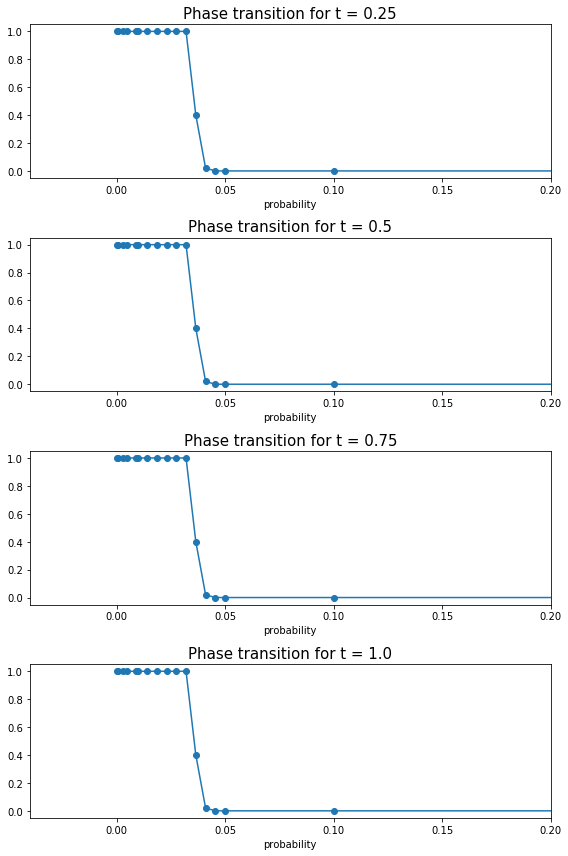

In [52]:
# reading probabilities
with open('data/keys{}.txt'.format(N), 'r') as f:
    prob = eval(f.read())
with open('data/keys_ref{}.txt'.format(N), 'r') as f:
    prob2 = eval(f.read())
prob.extend(prob2)
prob.sort()
print('Used probabilities:', prob)
# reading resistances
res = np.load('data/res_phase1.npy')

# show data on nodes per resistance value, for each gnp (mean on sample)
plot_p0(prob, d, N, res, t)

## Visualization of node data

In [51]:
def plot_data_nodes(prob, directed, n, res, t):
    # check the directed value
    if directed:
        lab = 'dir'
    else : lab = 'und'
    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'

    fig, axs = plt.subplots(len(prob), 3, figsize = (14,25))
    for i, p in enumerate(prob):
        # load data
        data = pd.read_csv('data/{}/data_node_{}_{}_{}.csv'.format(thr, lab, n, p))
        # plot data
        axs[i,0].set_title('Metrics with p = {}'.format(round(p,5)), fontsize=15)
        _ = axs[i,0].boxplot([data.loc[data.resistance == k, 'metric'] for k in res], positions = [1,2,3,4], labels=res)
        _ = axs[i,0].set_xlabel('resistance (t)', fontsize=12)
        axs[i,1].set_title('Max levels with p = {}'.format(round(p,5)), fontsize=15)
        _ = axs[i,1].boxplot([data.loc[data.resistance == k, 'max_level'] for k in res], positions = [1,2,3,4], labels=res)
        _ = axs[i,1].set_xlabel('resistance (t)', fontsize=12)
        axs[i,2].set_title('Avg levels with p = {}'.format(round(p,5)), fontsize=15)
        _ = axs[i,2].boxplot([data.loc[data.resistance == k, 'avg_level'] for k in res], positions = [1,2,3,4], labels=res)
        _ = axs[i,2].set_xlabel('resistance (t)', fontsize=12)
        # delete from memory
        del data

    #plt.suptitle('Data visualization for n = {}, {}'.format(n, lab), y=1.01, fontsize=20)
    plt.tight_layout()
    plt.savefig('images/stats_per_node_{}_{}_{}.jpeg'.format(thr, lab, n))

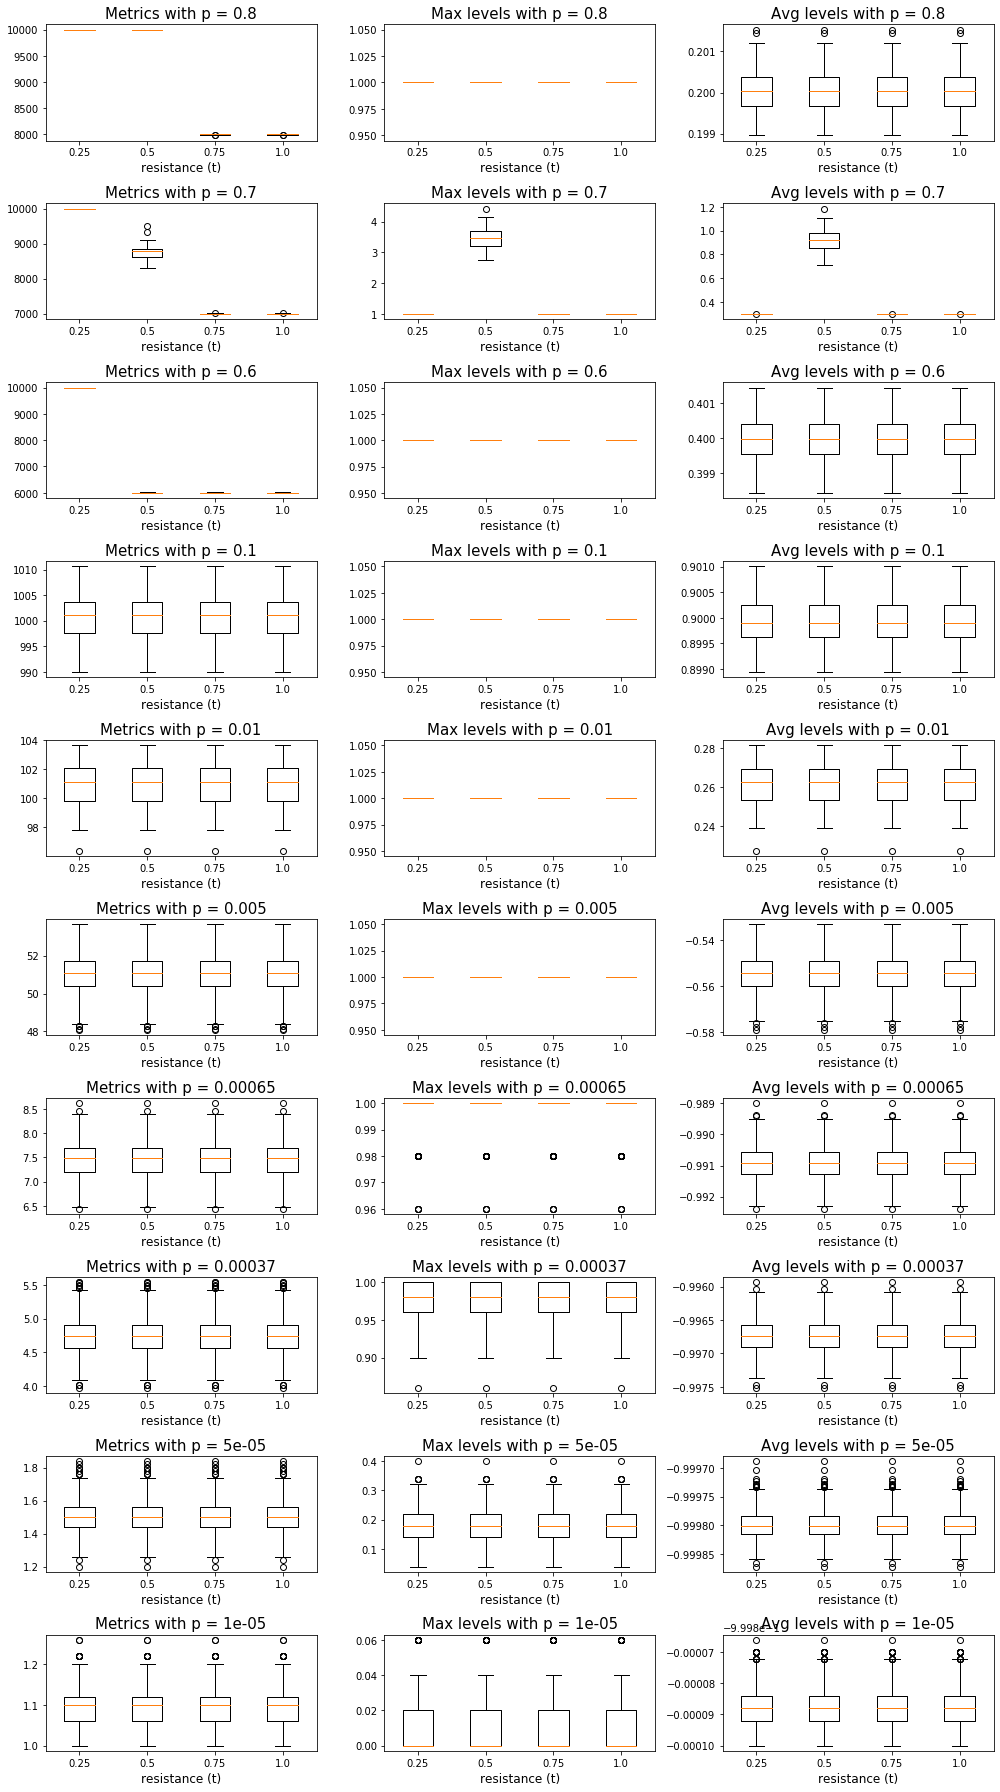

In [53]:
N = 10000
d = True

with open('data/keys{}.txt'.format(N), 'r') as f:
    prob = eval(f.read())
plot_data_nodes(prob, d, N, res, t)

## Visualizations of the approximited phase transition threshold

In [2]:
N = 1000
d = True
t = True

# reading resistances
res = np.load('data/res_phase1.npy')

Used probabilities: [0.0001, 0.0005, 0.002969251759660712, 0.004938503519321424, 0.009, 0.01, 0.01399999999999997, 0.018499999999999975, 0.02299999999999998, 0.027499999999999983, 0.03199999999999999, 0.03649999999999999, 0.040999999999999995, 0.0455, 0.05, 0.1, 0.6, 0.7, 0.8]


In [54]:
def plot_threshold(directed, sizes, res, t):
    # check the directed value
    if directed:
        lab = 'dir'
    else : lab = 'und'
    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'
    
    
    fig, axs = plt.subplots(len(res), 2, figsize = (10,12))
    for i, t in enumerate(res):
        data_0, data_1 = [], []
        for n in sizes:
            # reading probabilities
            with open('data/keys{}.txt'.format(n), 'r') as f:
                prob = eval(f.read())
            with open('data/keys_ref{}.txt'.format(n), 'r') as f:
                prob2 = eval(f.read())
            prob.extend(prob2)
            prob.sort()
            
            temp3_0,  temp3_1 = {}, {}
            for p in prob:
                # load data
                temp = pd.read_csv('data/{}/data_{}_{}_{}.csv'.format(thr, lab, n, p), index_col=0)
                # on each realization check for which nodes the property is realized
                temp2_0 = temp[temp.resistance == t].groupby('realization').apply(lambda x: (x.max_level <= 1) & (x.avg_level < 0))
                temp2_1 = temp[temp.resistance == t].groupby('realization').apply(lambda x: x.max_level ==0)
                temp3_0[p] = ((pd.DataFrame(temp2_0).groupby('realization').sum() > 0).mean()).values.item()
                temp3_1[p] = ((pd.DataFrame(temp2_1).groupby('realization').sum() > 0).mean()).values.item()
                del temp, temp2_0, temp2_1
            data_0.append(pd.Series(temp3_0).idxmax(1))
            data_1.append(pd.Series(temp3_1).idxmax(1))
        
        # plot data
        axs[i, 0].set_title('Phase transition of P0 for t = {}'.format(t), fontsize=15)
        _ = axs[i, 0].plot(sizes, data_0, 'ro-')
        _ = axs[i, 0].set_xlabel('sizes')
        _ = axs[i, 0].set_ylabel('probability threshold')
        axs[i, 1].set_title('Phase transition of P1 for t = {}'.format(t), fontsize=15)    
        _ = axs[i, 1].plot(sizes, data_1, 'go-')
        _ = axs[i, 1].set_xlabel('sizes')
        _ = axs[i, 1].set_ylabel('probability threshold')
        
    #plt.suptitle('Phase transition for maxlevel < 1, n = {}, {}'.format(n, lab), y=1.02, fontsize=20)
    plt.tight_layout()
    plt.savefig('images/phase_thr_{}_{}_{}.jpeg'.format(thr, lab, n))

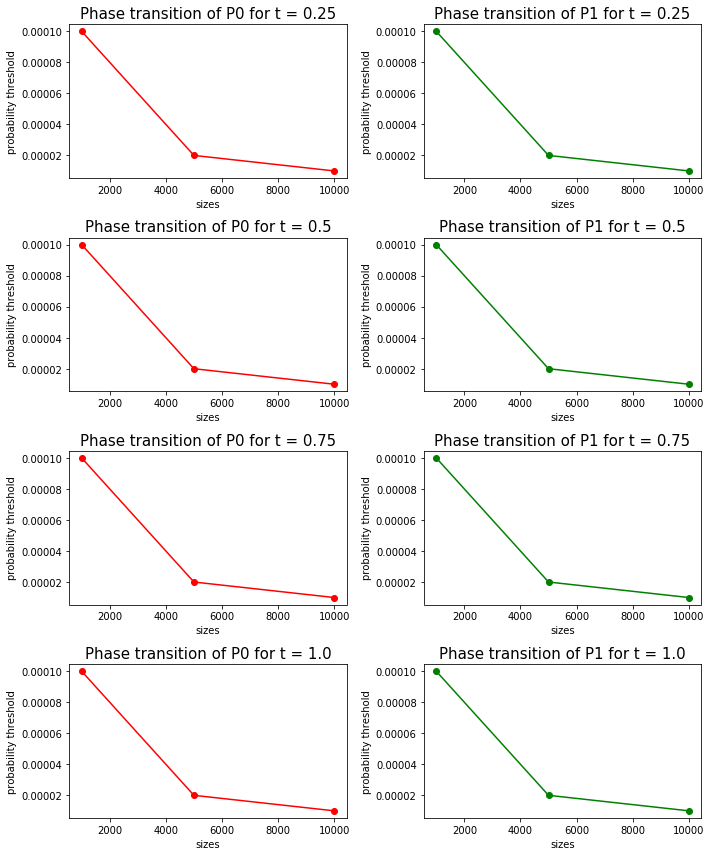

In [55]:
plot_threshold(False, [1000, 5000, 10000], res, t)

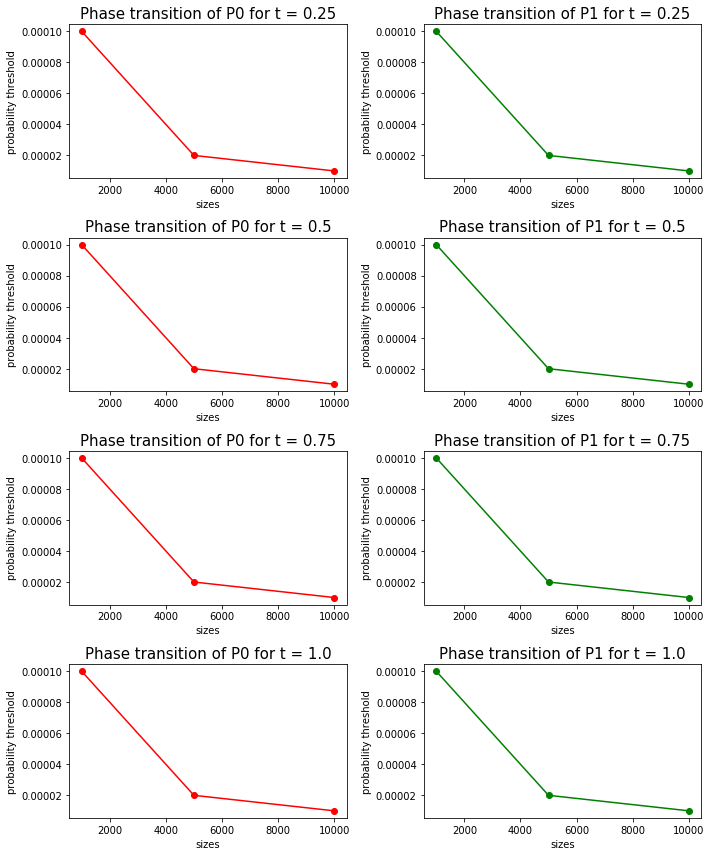

In [56]:
plot_threshold(True, [1000, 5000, 10000], res, t)